In [2]:
import numpy as np
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pickle
import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def predict_logistic(X, cutoff=0.5):
    with open('/content/drive/MyDrive/data/logistic.pkl', 'rb') as f:
      logistic_model = pickle.load(f)
    with open('/content/drive/MyDrive/data/logistic_vectorizer.pkl', 'rb') as f:
      vectorizer = pickle.load(f)

    X_vectorized = vectorizer.transform(X)
    y = logistic_model.predict_proba(X_vectorized)[:, 1]
    y_pred = (y >= cutoff).astype(int)
    return y_pred

def predict_pac(X, cutoff=0.5):
    with open('/content/drive/MyDrive/data/pac_pipeline.pkl', 'rb') as f:
      pac_model = pickle.load(f)

    y = pac_model.predict(X)
    y_pred = (y >= cutoff).astype(int)
    return y_pred

def predict_svm(X, cutoff=0.5):
    with open('/content/drive/MyDrive/data/svc_pipeline.pkl', 'rb') as f:
      svm_model = pickle.load(f)

    y = svm_model.predict(X)
    y_pred = (y >= cutoff).astype(int)
    return y_pred

def predict_decision_tree(X, cutoff=0.5):
    with open('/content/drive/MyDrive/data/decision_tree_model.pkl', 'rb') as f:
      dtc_model = pickle.load(f)
    with open('/content/drive/MyDrive/data/decision_tree_vectorizer.pkl', 'rb') as f:
      vectorizer = pickle.load(f)

    X_vectorized = vectorizer.transform(X)
    y = dtc_model.predict(X_vectorized)
    y_pred = (y >= cutoff).astype(int)
    return y_pred

def predict_random_forest(X, cutoff=0.5):
    with open('/content/drive/MyDrive/data/random_forest_model.pkl', 'rb') as f:
      rfc_model = pickle.load(f)
    with open('/content/drive/MyDrive/data/random_forest_vectorizer.pkl', 'rb') as f:
      vectorizer = pickle.load(f)

    X_vectorized = vectorizer.transform(X)
    y = rfc_model.predict(X_vectorized)
    y_pred = (y >= cutoff).astype(int)
    return y_pred

def predict_gradient_boosting(X, cutoff=0.5):
    with open('/content/drive/MyDrive/data/gradient_boosting_model.pkl', 'rb') as f:
      gbc_model = pickle.load(f)
    with open('/content/drive/MyDrive/data/gradient_boosting_vectorizer.pkl', 'rb') as f:
      vectorizer = pickle.load(f)

    X_vectorized = vectorizer.transform(X)
    y = gbc_model.predict(X_vectorized)
    y_pred = (y >= cutoff).astype(int)
    return y_pred

def predict_xgboost(X, cutoff=0.5):
    with open('/content/drive/MyDrive/data/xgboost_pipeline.pkl', 'rb') as f:
      xgboost_model = pickle.load(f)

    y = xgboost_model.predict(X)
    y_pred = (y >= cutoff).astype(int)
    return y_pred

def vote(X, cutoff=0.5):
    logistic_pred = predict_logistic(X, cutoff)
    pac_pred = predict_pac(X, cutoff)
    svm_pred = predict_svm(X, cutoff)
    dtc_pred = predict_decision_tree(X, cutoff)
    rfc_pred = predict_random_forest(X, cutoff)
    gbc_pred = predict_gradient_boosting(X, cutoff)
    xgboost_pred = predict_xgboost(X, cutoff)

    y_pred = (logistic_pred + pac_pred + svm_pred + dtc_pred + rfc_pred + gbc_pred + xgboost_pred)
    y_status = np.array([])
    for i in range(len(y_pred)):
      if y_pred[i] >= 4:
          y_status = np.append(y_status, f"Berita palsu dengan probabilitas {y_pred[i] / 7 * 100:.2f}%")
      else:
          y_status = np.append(y_status, f"Berita asli dengan probabilitas {(7 - y_pred[i]) / 7 * 100:.2f}%")
    y_pred = (y_pred >= 4).astype(int)
    return y_pred, y_status

df = pd.read_csv('/content/drive/MyDrive/data/val_10k.csv')
X = df['news']
y = df['is_fake']

print("Logistic Regression")
y_pred = predict_logistic(X)
print(f"Akurasi = {accuracy_score(y, y_pred) * 100:.2f}%\n")

print("PAC")
y_pred = predict_pac(X)
print(f"Akurasi = {accuracy_score(y, y_pred) * 100:.2f}%\n")

print("SVM")
y_pred = predict_svm(X)
print(f"Akurasi = {accuracy_score(y, y_pred) * 100:.2f}%\n")

print("Decision Tree")
y_pred = predict_decision_tree(X)
print(f"Akurasi = {accuracy_score(y, y_pred) * 100:.2f}%\n")

print("Random Forest")
y_pred = predict_random_forest(X)
print(f"Akurasi = {accuracy_score(y, y_pred) * 100:.2f}%\n")

print("Gradient Boosting")
y_pred = predict_gradient_boosting(X)
print(f"Akurasi = {accuracy_score(y, y_pred) * 100:.2f}%\n")

print("XGBoost")
y_pred = predict_xgboost(X)
print(f"Akurasi = {accuracy_score(y, y_pred) * 100:.2f}%\n")

print("Voting system")
y_pred, y_status = vote(X)
print(f"Akurasi = {accuracy_score(y, y_pred) * 100:.2f}%\n")
print(y_status[:10])
print(classification_report(y, y_pred))

Logistic Regression
Akurasi = 96.09%

PAC
Akurasi = 97.12%

SVM
Akurasi = 97.27%

Decision Tree
Akurasi = 94.27%

Random Forest
Akurasi = 96.75%

Gradient Boosting
Akurasi = 95.58%

XGBoost
Akurasi = 97.19%

Voting system
Akurasi = 97.66%

['Berita asli dengan probabilitas 100.00%'
 'Berita asli dengan probabilitas 100.00%'
 'Berita palsu dengan probabilitas 100.00%'
 'Berita palsu dengan probabilitas 85.71%'
 'Berita palsu dengan probabilitas 100.00%'
 'Berita asli dengan probabilitas 100.00%'
 'Berita asli dengan probabilitas 85.71%'
 'Berita asli dengan probabilitas 100.00%'
 'Berita palsu dengan probabilitas 100.00%'
 'Berita palsu dengan probabilitas 100.00%']
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      4729
           1       0.97      0.98      0.98      5271

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000


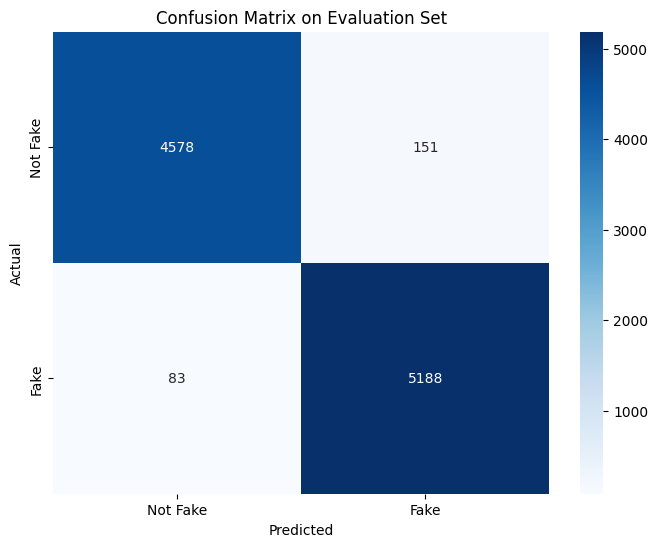

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

cfm = confusion_matrix(y, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cfm, fmt='.0f', annot=True, cmap='Blues',
            xticklabels=['Not Fake', 'Fake'],
            yticklabels=['Not Fake', 'Fake'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix on Evaluation Set')
plt.show()